# Data Science Salaries 2023

## Download the data

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [49]:
import pandas as pd
import numpy as np

DATASET_PATH = "./datasets/salaries/ds_salaries.csv"

salaries = pd.read_csv(DATASET_PATH)

## Data structure

In [50]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [51]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3754 non-null   int64 
 1   experience_level    3754 non-null   object
 2   employment_type     3754 non-null   object
 3   job_title           3754 non-null   object
 4   salary              3754 non-null   int64 
 5   salary_currency     3754 non-null   object
 6   salary_in_usd       3754 non-null   int64 
 7   employee_residence  3754 non-null   object
 8   remote_ratio        3754 non-null   int64 
 9   company_location    3754 non-null   object
 10  company_size        3754 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.7+ KB


In [52]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3754.000000,3.754000e+03,3754.000000,3754.000000
mean,2022.374001,1.907197e+05,137580.397975,46.283964
std,0.691177,6.717643e+05,63061.042594,48.589652
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [53]:
import matplotlib.pyplot as plt

cat_attributes = list(salaries.select_dtypes(include=["object"]))
num_attributes = list(salaries.select_dtypes(include=["int64"]))

print("Cat attributes: ", cat_attributes)
print("Num attributes: ", num_attributes)

Cat attributes:  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Num attributes:  ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

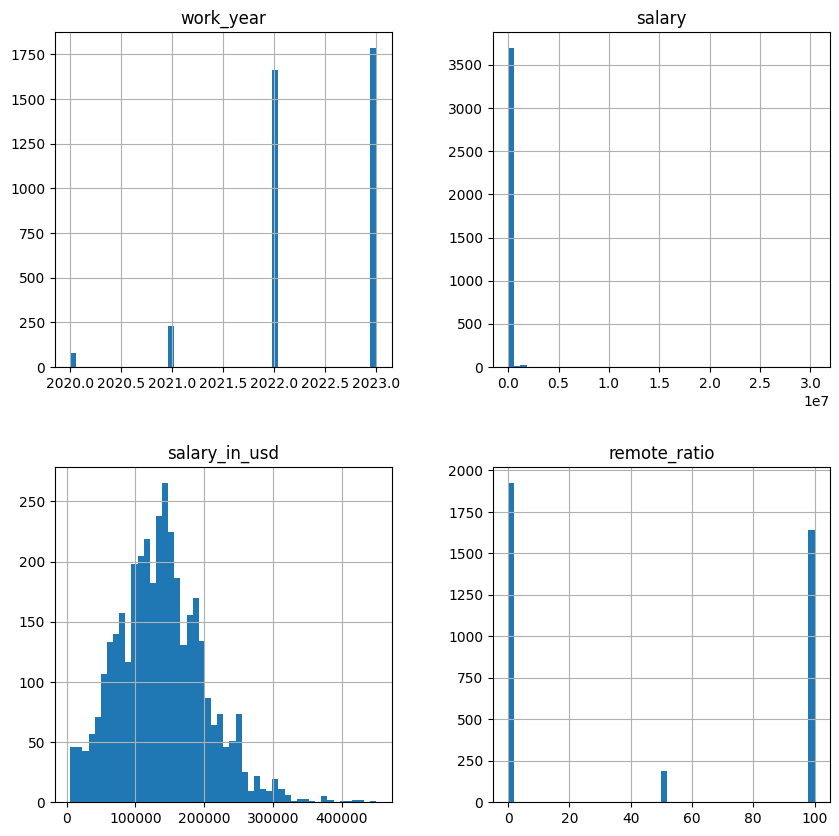

In [54]:
salaries[num_attributes].hist(bins=50, figsize=(10,10))

In [55]:
# Convert countries columns to the GDP per capita of each country
gdp = pd.read_csv("./datasets/salaries/GDP.csv", sep=";")
gdp.head()

,country_name,year,gdp,gdp_per_capita
0,United States,2021,2.299610e+13,69288
1,Luxembourg,2021,8.671080e+10,135683
2,United States,2020,2.089370e+13,63028
3,Luxembourg,2020,7.335313e+10,116356
4,United States,2019,2.137260e+13,65095


In [56]:
import pycountry

# Salaries["employee_residence"] and salaries["company_location"] to their ISO2
def get_country_name(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2).name
    except:
        print("Country not found: ", iso2)
        return None
    
salaries["employee_residence"] = salaries["employee_residence"].apply(get_country_name)
salaries["company_location"] = salaries["company_location"].apply(get_country_name)

In [57]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,United States,100,United States,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,United States,100,United States,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,Canada,100,Canada,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,Canada,100,Canada,M


In [58]:
def get_country_last_gdp(country_name):  
    # Group by country name, max(year)
    country_gdp = gdp[gdp["country_name"] == country_name]
    country_gdp = country_gdp[country_gdp["year"] == country_gdp["year"].max()]

    try:
        return country_gdp["gdp_per_capita"].values[0]
    except:
        print("Country not found: ", country_name)
        return None

salaries["employee_residence_gdp"] = salaries["employee_residence"].apply(get_country_last_gdp)
salaries["company_location_gdp"] = salaries["company_location"].apply(get_country_last_gdp)

In [59]:
# Lastly we remove irrelevant attributes
excluded_num_attributes = ["salary", "work_year"] # just keep salary in usd
excluded_cat_attributes = ["salary_currency"]

salaries = salaries.drop(excluded_num_attributes, axis=1)
salaries = salaries.drop(excluded_cat_attributes, axis=1)

In [60]:
# Print cat and num attributes again
cat_attributes = list(salaries.select_dtypes(include=["object"]))
num_attributes = list(salaries.select_dtypes(include=["int64"]))

print("Cat attributes: ", cat_attributes)
print("Num attributes: ", num_attributes)

Cat attributes:  ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Num attributes:  ['salary_in_usd', 'remote_ratio', 'employee_residence_gdp', 'company_location_gdp']


In [61]:
# Remove salary_in_usd, employee_residence, and company_location
salaries = salaries.drop(["employee_residence", "company_location"], axis=1)

In [62]:
# Get num and cat again
cat_attributes = list(salaries.select_dtypes(include=["object"]))
num_attributes = list(salaries.select_dtypes(include=["int64"]))

num_attributes.remove("salary_in_usd")

print("Cat attributes: ", cat_attributes)
print("Num attributes: ", num_attributes)

Cat attributes:  ['experience_level', 'employment_type', 'job_title', 'company_size']
Num attributes:  ['remote_ratio', 'employee_residence_gdp', 'company_location_gdp']


## Split the data

In [63]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(salaries, test_size=0.2, random_state=42)

In [64]:
salaries = train_set.drop("salary_in_usd", axis=1)
salaries_labels = train_set["salary_in_usd"].copy()

## Transformation pipeline: numerical

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

print("Num attributes: ", num_attributes)

# Imputer and 0-1
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

Num attributes:  ['remote_ratio', 'employee_residence_gdp', 'company_location_gdp']


## Transformation pipeline: categorical

In [66]:
print("Cat attributes: ", cat_attributes)

Cat attributes:  ['experience_level', 'employment_type', 'job_title', 'company_size']


### Experience level

In [67]:
salaries["experience_level"].value_counts()

experience_level
SE    2024
MI     635
EN     256
EX      88
Name: count, dtype: int64

### Employment type

In [68]:
salaries["employment_type"].value_counts()

employment_type
FT    2974
PT      13
CT       9
FL       7
Name: count, dtype: int64

### Job title

In [69]:
salaries["job_title"].value_counts()

job_title
Data Engineer                 852
Data Scientist                677
Data Analyst                  474
Machine Learning Engineer     233
Data Architect                 85
                             ... 
Principal Data Architect        1
Data Management Specialist      1
Finance Data Analyst            1
ETL Engineer                    1
BI Data Engineer                1
Name: count, Length: 84, dtype: int64

In [70]:
# Create a transformer that takes word frequency and top_n as hyperparameter
# Modifies the dataset by adding new columns for each word
# Creates columns job_<word> for each word in the top_n
# Populates the columns with 1 if the word is in the job title, 0 otherwise

# Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_english = stopwords.words('english')

from sklearn.base import BaseEstimator, TransformerMixin

class JobTitleWordFrequencyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=10):
        self.top_n = top_n
        self.word_frequency = {}
        self.top_n_words = []
    
    def fit(self, X, y=None):
        for job_title in X["job_title"]:
            for w in job_title.split(' '):
                if w in self.word_frequency:
                    self.word_frequency[w] += 1
                else:
                    self.word_frequency[w] = 1

        self.word_frequency = {k: v for k, v in sorted(self.word_frequency.items(), key=lambda item: item[1], reverse=True)}
        self.word_frequency = {k: v for k, v in self.word_frequency.items() if k not in stop_words_english}

        self.top_n_words = list(self.word_frequency.keys())[:self.top_n]

     

        return self
    
    def transform(self, X, y=None):
        X_out = pd.DataFrame()
        for word in self.top_n_words:
            X_out["job_" + word] = X["job_title"].apply(lambda x: 1 if word in x else 0)
        return X_out


### Company size

In [71]:
salaries["company_size"].value_counts()

company_size
M    2520
L     366
S     117
Name: count, dtype: int64

### Cat final pipeline

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = ColumnTransformer([
    ("one_hot", OneHotEncoder(), ["experience_level", "employment_type", "company_size"]),
    ("job_title", JobTitleWordFrequencyTransformer(top_n=20), ["job_title"])
], remainder="drop")


## Final pipeline

In [98]:
from sklearn.ensemble import RandomForestRegressor

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

final_pipeline = Pipeline([
    ("full_pipeline", full_pipeline),
    ("imputer", SimpleImputer(strategy="median"))
])

salaries_prepared = final_pipeline.fit_transform(salaries)


## Train a model - Random Forest Regressor

### Grid search

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 20, 50], 'max_features': [2, 3, 4, 10]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    verbose=1)

grid_search.fit(salaries_prepared, salaries_labels)

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 10],
                          'n_estimators': [3, 10, 20, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [120]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

 ### Analyze the best model

In [121]:
best_estimator = grid_search.best_estimator_
feature_importances = best_estimator.feature_importances_
feature_importances

array([0.04798502, 0.21167498, 0.19136004, 0.05341268, 0.04245043,
       0.05302864, 0.07823623, 0.00538711, 0.00077685, 0.00725762,
       0.00219971, 0.01431351, 0.02032476, 0.01646603, 0.02810122,
       0.01918331, 0.02136327, 0.06875193, 0.00922764, 0.00912562,
       0.00803097, 0.01393348, 0.00576118, 0.01473   , 0.00788107,
       0.00832682, 0.0089952 , 0.006986  , 0.00329523, 0.00379651,
       0.00293578, 0.00247617, 0.00890417, 0.00332081])

In [122]:
one_hot_attribs = list(full_pipeline.named_transformers_["cat"].named_transformers_["one_hot"].get_feature_names_out()) 
job_title_attribs = ["job_" + word for word in full_pipeline.named_transformers_["cat"].named_transformers_["job_title"].top_n_words] 

# combina todas las listas para obtener la lista completa de características
attributes = num_attributes + one_hot_attribs + job_title_attribs

In [123]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.21167498259543865, 'employee_residence_gdp'),
 (0.19136003989526962, 'company_location_gdp'),
 (0.07823622538602923, 'experience_level_SE'),
 (0.06875192992042926, 'job_Analyst'),
 (0.0534126812322606, 'experience_level_EN'),
 (0.0530286426637914, 'experience_level_MI'),
 (0.04798501768621019, 'remote_ratio'),
 (0.042450431232364166, 'experience_level_EX'),
 (0.028101218460587624, 'job_Data'),
 (0.021363269145398246, 'job_Scientist'),
 (0.020324764383971645, 'company_size_M'),
 (0.019183313485049463, 'job_Engineer'),
 (0.016466026885164402, 'company_size_S'),
 (0.014730001621347402, 'job_Science'),
 (0.014313506172562471, 'company_size_L'),
 (0.0139334775310287, 'job_Research'),
 (0.009227641628149527, 'job_Learning'),
 (0.009125619259463974, 'job_Machine'),
 (0.008995201097109272, 'job_Lead'),
 (0.008904174109874667, 'job_AI'),
 (0.008326824341370042, 'job_Applied'),
 (0.008030969875981616, 'job_Analytics'),
 (0.007881066695340876, 'job_Manager'),
 (0.007257620764181835, 'employme

### Evaluate the model on the test set

In [124]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("salary_in_usd", axis=1)
y_test = test_set["salary_in_usd"].copy()

In [125]:
X_test_prepared = final_pipeline.transform(X_test)

In [126]:
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49441.395226896035

In [127]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([44534.82771931, 53903.17471147])

In [128]:
# Get precission of the model
from sklearn.metrics import r2_score
r2_score(y_test, final_predictions)

0.4077034113721939

## Exercise 1 - Try a  Vector Machine regressor

### Grid search

In [165]:
from sklearn.svm import SVR

param_grid_svr = [
    {"kernel": ["linear"], "C": [0.01, 1, 1e2, 1e3, 1e5]},
    {"kernel": ["rbf"], "C": [0.01, 0.1, 1], "gamma": [0.1, 1]}
]

svr = SVR()
grid_search = GridSearchCV(
    svr,
    param_grid_svr,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    verbose=10
)

grid_search.fit(salaries_prepared, salaries_labels)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5; 1/11] START C=0.01, kernel=linear......................................
[CV 1/5; 1/11] END C=0.01, kernel=linear;, score=(train=-3909516087.471, test=-4081752615.490) total time=   0.1s
[CV 2/5; 1/11] START C=0.01, kernel=linear......................................
[CV 2/5; 1/11] END C=0.01, kernel=linear;, score=(train=-3916707688.476, test=-4052948275.640) total time=   0.0s
[CV 3/5; 1/11] START C=0.01, kernel=linear......................................
[CV 3/5; 1/11] END C=0.01, kernel=linear;, score=(train=-3968617314.363, test=-3845925212.440) total time=   0.0s
[CV 4/5; 1/11] START C=0.01, kernel=linear......................................
[CV 4/5; 1/11] END C=0.01, kernel=linear;, score=(train=-3964076724.063, test=-3863921737.891) total time=   0.0s
[CV 5/5; 1/11] START C=0.01, kernel=linear......................................
[CV 5/5; 1/11] END C=0.01, kernel=linear;, score=(train=-3961215733.242, test=

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 1, 100.0, 1000.0, 100000.0],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1], 'gamma': [0.1, 1],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=10)

In [166]:
grid_search.best_params_

{'C': 100000.0, 'kernel': 'linear'}

### Analyze the best model

In [167]:
# Best svr model
best_svr = grid_search.best_estimator_

# Feature importances of SVR
feature_importances_svr = best_svr.coef_
feature_importances_svr

array([[   823.74544238,  15467.138795  ,   8950.39861699,
        -38907.42961076,  54025.18945509, -20450.48017834,
          5332.72033402,  -2570.12595071,  -6657.18811316,
         17813.83273736,  -8586.51867349,    808.41163839,
          8115.43777813,  -8923.84941652, -18257.77831683,
         12239.88577717,  15093.80366522, -15906.3731084 ,
         -2470.99730771,   -439.84351999, -14211.03551002,
          2529.07337237,  22093.47133998,  22096.90354932,
         21304.24493241,  12742.50457423,  14123.96039988,
         -9963.63021492,  13186.27991856,  -6199.98211505,
         -6657.18811316,  -6657.18811316,  13018.40414792,
        -35803.89100039]])

### Evaluate the model on the test set

In [168]:
X_test = test_set.drop("salary_in_usd", axis=1)
y_test = test_set["salary_in_usd"].copy()
X_test_prepared = final_pipeline.transform(X_test)

In [170]:
from sklearn.metrics import mean_squared_error

final_model_svr = grid_search.best_estimator_
final_predictions = final_model_svr.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

51748.648146531115

In [171]:
# Get precission of the model
r2_score(y_test, final_predictions)

0.35113281180550415

## Exercise 2 - Try replacing GridSearchCV with RandomizedSearchCV

In [173]:
# Try with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}

svr = SVR()
rnd_search = RandomizedSearchCV(
    svr,
    param_distributions=param_distribs,
    n_iter=50,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=10,
    random_state=42
)

rnd_search.fit(salaries_prepared, salaries_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=629.7823295913721, gamma=3.010121430917521, kernel=linear
[CV 1/5; 1/50] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear;, score=-2770808753.173 total time=   0.1s
[CV 2/5; 1/50] START C=629.7823295913721, gamma=3.010121430917521, kernel=linear
[CV 2/5; 1/50] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear;, score=-2690954925.177 total time=   0.1s
[CV 3/5; 1/50] START C=629.7823295913721, gamma=3.010121430917521, kernel=linear
[CV 3/5; 1/50] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear;, score=-2423513022.344 total time=   0.0s
[CV 4/5; 1/50] START C=629.7823295913721, gamma=3.010121430917521, kernel=linear
[CV 4/5; 1/50] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear;, score=-2471639632.566 total time=   0.1s
[CV 5/5; 1/50] START C=629.7823295913721, gamma=3.010121430917521, kernel=linear
[CV 5/5; 1/50] END C=629.7823295913721, gamma

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D5ADEF3FA0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D5ADFAFAC0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=10)

In [175]:
rnd_search.best_params_

{'C': 24547.601975705937, 'gamma': 0.22153944050588595, 'kernel': 'rbf'}

In [179]:
# Feature importances of SVR
feature_importances_svr_rnd = best_svr.coef_
feature_importances_svr_rnd

array([[   823.74544238,  15467.138795  ,   8950.39861699,
        -38907.42961076,  54025.18945509, -20450.48017834,
          5332.72033402,  -2570.12595071,  -6657.18811316,
         17813.83273736,  -8586.51867349,    808.41163839,
          8115.43777813,  -8923.84941652, -18257.77831683,
         12239.88577717,  15093.80366522, -15906.3731084 ,
         -2470.99730771,   -439.84351999, -14211.03551002,
          2529.07337237,  22093.47133998,  22096.90354932,
         21304.24493241,  12742.50457423,  14123.96039988,
         -9963.63021492,  13186.27991856,  -6199.98211505,
         -6657.18811316,  -6657.18811316,  13018.40414792,
        -35803.89100039]])

In [181]:
sorted(zip(feature_importances_svr_rnd, attributes), reverse=True)

[(array([   823.74544238,  15467.138795  ,   8950.39861699, -38907.42961076,
          54025.18945509, -20450.48017834,   5332.72033402,  -2570.12595071,
          -6657.18811316,  17813.83273736,  -8586.51867349,    808.41163839,
           8115.43777813,  -8923.84941652, -18257.77831683,  12239.88577717,
          15093.80366522, -15906.3731084 ,  -2470.99730771,   -439.84351999,
         -14211.03551002,   2529.07337237,  22093.47133998,  22096.90354932,
          21304.24493241,  12742.50457423,  14123.96039988,  -9963.63021492,
          13186.27991856,  -6199.98211505,  -6657.18811316,  -6657.18811316,
          13018.40414792, -35803.89100039]),
  'remote_ratio')]

In [182]:
from sklearn.metrics import mean_squared_error

final_model_svr_rnd = rnd_search.best_estimator_
final_predictions = final_model_svr_rnd.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50137.89318722578

In [183]:
r2_score(y_test, final_predictions)

0.3908980961590539

: 